# $LAB9$ $TASK2$

## 任务一：关联分析

调库

In [4]:
import pandas as pd
import numpy as np
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from apyori import apriori

导入数据并矩阵化

In [5]:
filename = 'E:/大学课程/AI程序设计/实验部分/实验9 聚类-关联-异常/实验课聚类关联分析/car.data.csv'
data_origin = pd.read_csv(filename, engine = 'python')
data_origin_matrix = data_origin.values
data_origin_matrix

array([['vhigh', 'vhigh', '2', ..., 'small', 'low', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype=object)

对数据表中各个属性的值进行区分

In [6]:
for item in data_origin_matrix:
    if item[0]=='vhigh':
        item[0]='buying_vhigh'
    elif item[0]=='high':
        item[0]='buying_high'
    elif item[0]=='med':
        item[0]='buying_med'
    else:
        item[0]='buying_low'
        
for item in data_origin_matrix:
    if item[1]=='vhigh':
        item[1]='paint_vhigh'
    elif item[1]=='high':
        item[1]='paint_high'
    elif item[1]=='med':
        item[1]='paint_med'
    else:
        item[1]='paint_low'
        
for item in data_origin_matrix:
    if item[2]=='2':
        item[2]='doors_2'
    elif item[2]=='3':
        item[2]='doors_3'
    elif item[2]=='4':
        item[2]='doors_4'
    else:
        item[2]='doors_5more'
        
for item in data_origin_matrix:
    if item[3]=='2':
        item[3]='person_2'
    elif item[3]=='4':
        item[3]='person_4'
    else:
        item[3]='person_more'
    
for item in data_origin_matrix:
    if item[4]=='small':
        item[4]='lug_boot_small'
    elif item[4]=='med':
        item[4]='lug_boot_med'
    else:
        item[4]='lug_boot_big'
        

for item in data_origin_matrix:
    if item[5]=='low':
        item[5]='safety_low'
    elif item[5]=='med':
        item[5]='safety_med'
    else:
        item[5]='safety_high'

利用$Python$中$apyori$库中的$apriori$函数进行关联分析

设置置信度，支持度，提升度

$Support$（支持度）：表示同时包含 $A$ 和 $B$ 的事务占所有事务的比例。如果用 $P(A)$ 表示包含 $A$ 的事务的比例，那么 $Support$ = $P$ $($ $A$ & $B$$)$

$Confidence$（可信度）：表示包含 $A$ 的事务中同时包含 $B$ 的事务的比例，即同时包含 $A$ 和 $B$ 的事务占包含 $A$ 的事务的比例。公式表达：$Confidence$ = $P$($A$ & $B$)/ $P$($A$)

$Lift$（提升度）：表示“包含 $A$ 的事务中同时包含 $B$ 的事务的比例”与“包含 $B$ 的事务的比例”的比值。公式表达：$Lift$ = ( $P$（$A$ & $B$）/ $P$($A$) ) / $P$($B$) = $P$（$A$ & $B$）/ $P$($A$) / $P$($B$)。

提升度反映了关联规则中的 $A$ 与 $B$ 的相关性，提升度 $> 1$ 且越高表明正相关性越高，提升度 $< 1$ 且越低表明负相关性越高，提升度 $= 1$ 表明没有相关性。

In [7]:
min_supp = 0.3
min_conf = 0.8

In [8]:
results = list(apriori(transactions = data_origin_matrix, min_support = min_supp,min_confidence=min_conf))
results

[RelationRecord(items=frozenset({'person_2', 'unacc'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'person_2'}), items_add=frozenset({'unacc'}), confidence=1.0, lift=1.428099173553719)]),
 RelationRecord(items=frozenset({'unacc', 'safety_low'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'safety_low'}), items_add=frozenset({'unacc'}), confidence=1.0, lift=1.428099173553719)])]

如果取$min$_$supp$=$0.3$,$min$_$conf$=$0.8$,那么可以得到关联分析的结果：

$person$属性的值$2$,与分类结果$unacc$具有较强相关性，$person=2$$->$$unacc$,支持度为$0.3$,置信度为$1.0$

$safety$属性的值$low$,与分类结果$unacc$也具有较强的相关性，$safety$=$low$$->$$unacc$,支持度为$0.3$,置信度为$1.0$


In [9]:
min_supp = 0.2
min_conf = 0.6

In [10]:
results = list(apriori(transactions = data_origin_matrix, min_support = min_supp,min_confidence=min_conf))
results

[RelationRecord(items=frozenset({'unacc'}), support=0.7002314814814815, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'unacc'}), confidence=0.7002314814814815, lift=1.0)]),
 RelationRecord(items=frozenset({'unacc', 'buying_vhigh'}), support=0.20833333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buying_vhigh'}), items_add=frozenset({'unacc'}), confidence=0.8333333333333334, lift=1.1900826446280992)]),
 RelationRecord(items=frozenset({'unacc', 'lug_boot_big'}), support=0.21296296296296297, ordered_statistics=[OrderedStatistic(items_base=frozenset({'lug_boot_big'}), items_add=frozenset({'unacc'}), confidence=0.638888888888889, lift=0.9123966942148761)]),
 RelationRecord(items=frozenset({'unacc', 'lug_boot_med'}), support=0.22685185185185186, ordered_statistics=[OrderedStatistic(items_base=frozenset({'lug_boot_med'}), items_add=frozenset({'unacc'}), confidence=0.6805555555555556, lift=0.971900826446281)]),
 RelationRecord(items=

如果取$min$_$supp$=$0.2$,$min$_$conf$=$0.6$,那么可以得到关联分析的结果：

$person$属性的值$2$,与分类结果$unacc$具有较强相关性，$person=2$$->$$unacc$,支持度为$0.3$,置信度为$1.0$

$safety$属性的值$low$,与分类结果$unacc$具有较强的相关性，$safety$=$low$$->$$unacc$,支持度为$0.3$,置信度为$1.0$

$safety$属性的值$med$,与分类结果$unacc$具有较强的相关性，$safety$=$med$$->$$unacc$,支持度为$0.21$,置信度为$0.62$

$lug_boot$属性的值$big$,与分类结果$unacc$也具有较强的相关性，$lug_boot$=$big$$->$$unacc$,支持度为$0.21$,置信度为$0.64$

$lug_boot$属性的值$med$,与分类结果$unacc$也具有较强的相关性，$lug_boot$=$med$$->$$unacc$,支持度为$0.23$,置信度为$0.68$

$lug_boot$属性的值$small$,与分类结果$unacc$也具有较强的相关性，$lug_boot$=$small$$->$$unacc$,支持度为$0.26$,置信度为$0.78$

$paint$属性的值$vhigh$,与分类结果$unacc$也具有较强的相关性，$paint$=$vhigh$$->$$unacc$,支持度为$0.21$,置信度为$0.83$


## 任务二：聚类

调库

In [11]:
from sklearn.cluster import KMeans

重新导入数据

In [44]:
filename = 'E:/大学课程/AI程序设计/实验部分/实验9 聚类-关联-异常/实验课聚类关联分析/car.data.csv'
data_origin = pd.read_csv(filename, engine = 'python')
data_mid = data_origin.loc[:,['buying','paint','doors','persons','lug_boot','safety']]
data_mid_matrix=data_mid.values

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ...,
       ['low', 'low', '5more', 'more', 'big', 'low'],
       ['low', 'low', '5more', 'more', 'big', 'med'],
       ['low', 'low', '5more', 'more', 'big', 'high']], dtype=object)

处理数据

In [54]:
for item in data_mid_matrix:
    if item[0]=='vhigh':
        item[0]=4
    elif item[0]=='high':
        item[0]=3
    elif item[0]=='med':
        item[0]=2
    else:
        item[0]=1
        
for item in data_mid_matrix:
    if item[1]=='vhigh':
        item[1]=4
    elif item[1]=='high':
        item[1]=3
    elif item[1]=='med':
        item[1]=2
    else:
        item[1]=1
        
for item in data_mid_matrix:
    if item[2]=='2':
        item[2]=2
    elif item[2]=='3':
        item[2]=3
    elif item[2]=='4':
        item[2]=4
    else:
        item[2]=5
        
for item in data_mid_matrix:
    if item[3]=='2':
        item[3]=2
    elif item[3]=='4':
        item[3]=4
    else:
        item[3]=5
    
for item in data_mid_matrix:
    if item[4]=='small':
        item[4]=1
    elif item[4]=='med':
        item[4]=2
    else:
        item[4]=3
        

for item in data_mid_matrix:
    if item[5]=='low':
        item[5]=1
    elif item[5]=='med':
        item[5]=2
    else:
        item[5]=3

聚类

In [55]:
clf = KMeans(n_clusters=4)
y_pred = clf.fit_predict(data_mid_matrix)

F:\Anaconda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


可视化聚类与关联分析的关系

In [56]:
X_person_lst = []
X_safety_lst = []
X_paint_lst = []
X_lugboot_lst = []
Y_lst = []

for item in data_origin_matrix:
    X_person_lst.append(item[3])
    X_safety_lst.append(item[5])
    X_paint_lst.append(item[1])
    X_lugboot_lst.append(item[4])
    
    Y_lst.append(item[6])

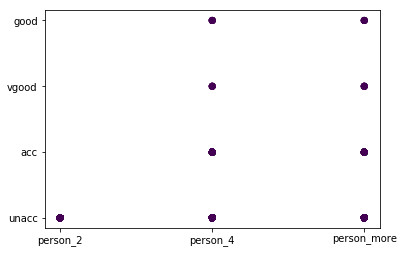

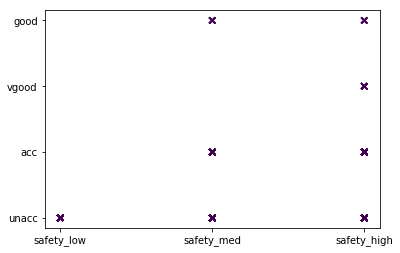

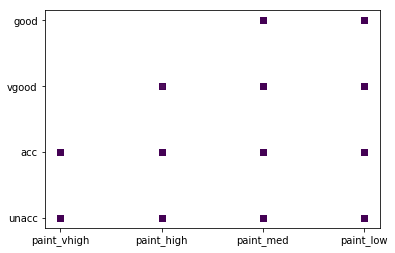

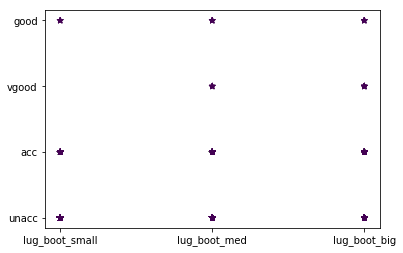

In [57]:
ax1 = plt.figure().add_subplot(111)
ax1.scatter(X_person_lst,Y_lst, c=y_pred,marker='o',alpha = 0.2)
ax2 = plt.figure().add_subplot(111)
ax2.scatter(X_safety_lst,Y_lst, c=y_pred,marker='x',alpha = 0.2)
ax3 = plt.figure().add_subplot(111)
ax3.scatter(X_paint_lst,Y_lst, c=y_pred,marker='s',alpha = 0.2)
ax4 = plt.figure().add_subplot(111)
ax4.scatter(X_lugboot_lst,Y_lst, c=y_pred,marker='*',alpha = 0.2)

通过图示可以观察出，上述的关联分析得到的结果，在聚类之中显现了出来，例如$person$=$2$与$unacc$的便很明显，$safety$=$low$与$unacc$的关系也很明显，$paint$,$lug$_$boot$与$unacc$的关系可以通过点的颜色深度观察出来